In [37]:
import random  
import matplotlib.pyplot as plt 
import numpy as np

#import necessary modules 

In [38]:
#will have 3 custom classes
#define individual class named warbler

class warbler:
    """Class to hold information on individual Warbling Babblers"""
    
    #set up individuals with id and a phenotype.
    #phenotype listed in this class so that attribute is assigned to individual and does not change throughout simulation when population changes 
    def __init__(self, myID, phenotype): 
        self.myID = myID
        self.phenotype = phenotype
    
    #this will return a text description of each individual warbler when called.    
    #useful to visualize whether moving function is working properly
    def __repr__(self): 
        txt="warbler {}, desc={}"
        return txt.format(self.myID, self.phenotype) 
           
    

In [39]:
#another class
class population:
    """The population class will define how many individuals there are"""

    #Gives each population an ID, gives the phenotype of the starting population, & sets the size of the population 
    def __init__ (self, myID, initPheno,popSize=10): 
        self.myID = myID
        self.popSize = popSize
    
        self.startPop1=[] #an empty list to store individuals that start in population 1
        for i in range(popSize): #this will loop the number of individuals to be within the population size                                    
                self.startPop1.append(warbler(i+1, initPheno)) #appends individual to list startPop1 and its phenotype.
    
    #Will return a text description of all the warblers in starting population 1 when this function is called             
    def __repr__(self): 
        txt = "Population #{}"
        print(txt.format(self.myID))
        for i in self.startPop1:
            print(i)
        return "End List"  
    
#defines the function migrate to move the Warblers from one population at random

    def migrate(self, weights): #weights is defined in myMatrix in the landscape class
        leaving=[] #Temporary list "leaving" that will be returned after each use. 
        ##this will hold any warbler that chooses to leave the population, until all warblers have gone through random choice
        ###this prevents going through an infinite loop
        
        for i in self.startPop1:
            myChoice = random.choices(["stay","go"], weights)[0] #for every Warbler in the starting population, make a random choice to either stay in that population or migrate to the other population
            #print(myChoice) ##seeing where i am in the code  
            if myChoice == "go": #if the choice is "go" then the warbler will be added to the "leaving" list
                leaving.append(i)
                #print("inside migrate...Will Go:") ##more checks on code 
                #print(i)
        #print(leaving)
        
        #for all warblers in the "leaving" list, remove from starting population 
        for i in leaving: 
            self.startPop1.remove(i)
            #print("Going:")
            #print(i)
        return leaving 
    
    # This function will be used to add new warblers to a population in the landscape class 
    # warblers that leave population 1 will be added to population 2
    # warblers that leave population 2 will be added to population 1 
    def add(self, newWarbs): 
        self.startPop1.extend(newWarbs)
        
    # this function will be used to count the number of warblers in each population by phenotype 
    # this will make graphing easier 
    def count(self):
        countBright = 0 # set the starting count bright to 0
        countNeutral = 0 # set the starting count neutral to 0
        for i in self.startPop1: 
            if i.phenotype == "bright":
                countBright+=1             #For all warblers in population, if phenotype is "bright" add to countBright 
            if i.phenotype == "neutral":
                countNeutral+=1            #For all warblers in population, if phenotype is "neutral" add to countNeutral
        return [countBright, countNeutral]

        

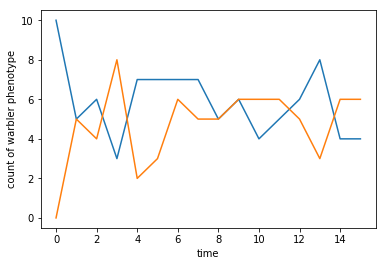

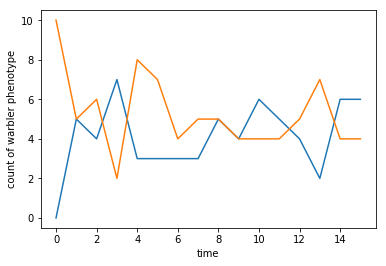

In [40]:
#Another Class called landscape

class landscape:
    """Class to hold our populations"""
    

#defining the landscape and default landscape size. Weights will be used in the migrate function 
# Weights will be given with a matrix called myMatrix 

    def __init__ (self, weights, landSize=20): 
        pop_1=population(1, "bright")  #making population 1 with id=1 and phenotype = bright
        pop_2=population(2, "neutral") #making population 2 with id=2 and phenotype = neutral
        self.landSize = landSize
        self.populations=[pop_1, pop_2] #create a list of populations in the landscape 
        self.weights = weights
        
    def __repr__(self):  #another print check of the list of populations
        print("Populations")
        for i in self.populations:
            print(i)
        return "End List"     

#change function.  defines leaving list from population 1 and population 2 by calling migrate function from population class
#Python counts first item as "0" so that is Population 1 while Python count "1" is population 2
#make a leaving list from the random choices in population 1, any that chose "go", will get put into the leaving 0 list
#make a leavign list from the random choices in population 2, any that chose "go", get put into leaving 1 list
#use add function from population class to add leaving 0 list to population 2
#use add function from population class to add leaving list 1 to population 1 
    def change(self):  
        leaving0 = self.populations[0].migrate(self.weights[0])
        leaving1 = self.populations[1].migrate(self.weights[1])
        self.populations[0].add(leaving1)
        self.populations[1].add(leaving0)
        #print(leaving0)
        
# makes the doIt function for the number of weeks specified 

    def doIt(self, numWeeks):
            
            warblerPop0 = [self.populations[0].count()] #defines count of "bright" and "neutral" warberlers in population 1 
            warblerPop1 = [self.populations[1].count()] #defines count of "bright" and "neutral warblers in population 2
            for i  in range(numWeeks):  # for the number of weeks specified, perform change function 
                self.change()
                warblerPop0.append(self.populations[0].count()) #append the population 1 count of "bright" and "neutraL" with the changes made in each week
                warblerPop1.append(self.populations[1].count()) #append the population 2 count of "bright" and "neutral" with the changes made in each week
                
            time_points = range(numWeeks+1)  #defining time points to be x axis later, need to add 1 due to python reading method
            plt.plot(time_points, warblerPop0) #plot time points on x axis and counts of bright and netural on y axis in population 1
            plt.xlabel('time') 
            plt.ylabel('count of warbler phenotype')
            plt.figure()  # make another plot 
            plt.plot(time_points, warblerPop1) #plot time points on x axis and counts of bright and neutral on y axis in population 2
            plt.xlabel('time')
            plt.ylabel('count of warbler phenotype')
            plt.show()
            

            
myMatrix = [[.5 ,.5],[.5,.5]]
        
land_1=landscape(myMatrix) #made a landscape instance called land_1
land_1.doIt(15)




How do the frequencies of phenotypes change in each population week-by-week as individuals move? 
ANS: They begin as having one phenotype per population. The given matrix weight will determine how long the populations' phenotypes will become "50/50" in both populations. Example: a matrix weight of .9/.1 will take more weeks for the phenotypes in each population to become equal as opposed to a matrix weight of .7/.3. This can be seen by changing "myMatrix" and "numWeeks" in the doIt function.  

What effect does an overall increase in the rate of movement (migration) have?
ANS: As movement increases, the starting population converges to the other population more quickly. 

What happens to both phenotype frequencies and population sizes when movement probabilities are not symmetric individuals have a higher probability of moving from population A to population B, than they do of moving from population B to population A?
ANS: The population size of one will be larger than the other after simulation as opposed to a more symmetrical size as seen above. This can also be changed and seen when changing the weight of "myMatrix"

What effect does changing the starting population sizes have on the trajectory of phenotype frequencies? In other words, what might happen if you connect big habitat patches versus small habitat patches?
ANS: It would take more time for the two populations (big and small) to become of equal size with one another. This can be tested by changing start population sizes. 